In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Image size and batch size
img_size = (224, 224)
batch_size = 16

train_data = train_datagen.flow_from_directory(
    "data/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_test_datagen.flow_from_directory(
    "data/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = val_test_datagen.flow_from_directory(
    "data/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 17496 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3752 images belonging to 2 classes.


In [15]:
# Load MobileNetV2 without the top layer
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)


In [16]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [17]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 915s 831ms/step - accuracy: 0.9123 - loss: 0.2156 - val_accuracy: 0.9795 - val_loss: 0.0569
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1294s 1s/step - accuracy: 0.9716 - loss: 0.0740 - val_accuracy: 0.9851 - val_loss: 0.0467
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1024s 936ms/step - accuracy: 0.9743 - loss: 0.0698 - val_accuracy: 0.9824 - val_loss: 0.0500
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 817s 747ms/step - accuracy: 0.9720 - loss: 0.0691 - val_accuracy: 0.9832 - val_loss: 0.0476
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 812s 741ms/step - accuracy: 0.9751 - loss: 0.0631 - val_accuracy: 0.9843 - val_loss: 0.0450
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 961s 879ms/step - accuracy: 0.9749 - loss: 0.0658 - val_accuracy: 0.9829 - val_loss: 0.0455
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1266s 1s/step - accuracy: 0.9754 - loss: 0.0628 - val_accuracy: 0.9845 - val_loss: 0.0441
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 737s 674ms/step - accur

In [18]:
model.save("cat_dog_classifier.keras")

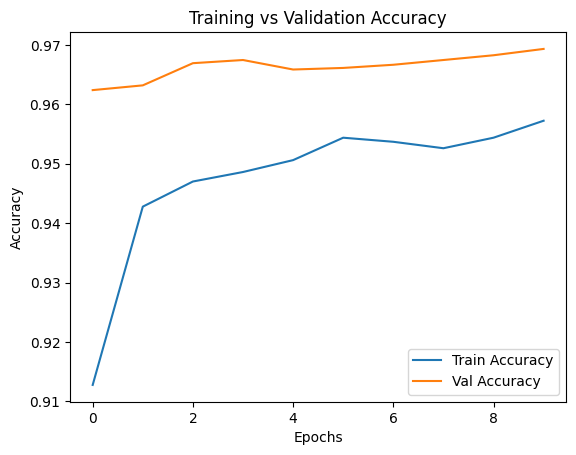

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
#steps_per_epoch_half = train_gen_full.samples // (2 * BATCH_SIZE)
# history = model.fit(
#     train_gen_full,
#     steps_per_epoch=steps_per_epoch_half,  # 50% of data
#     validation_data=val_gen,
#     epochs=20,
#     callbacks=callbacks
# )


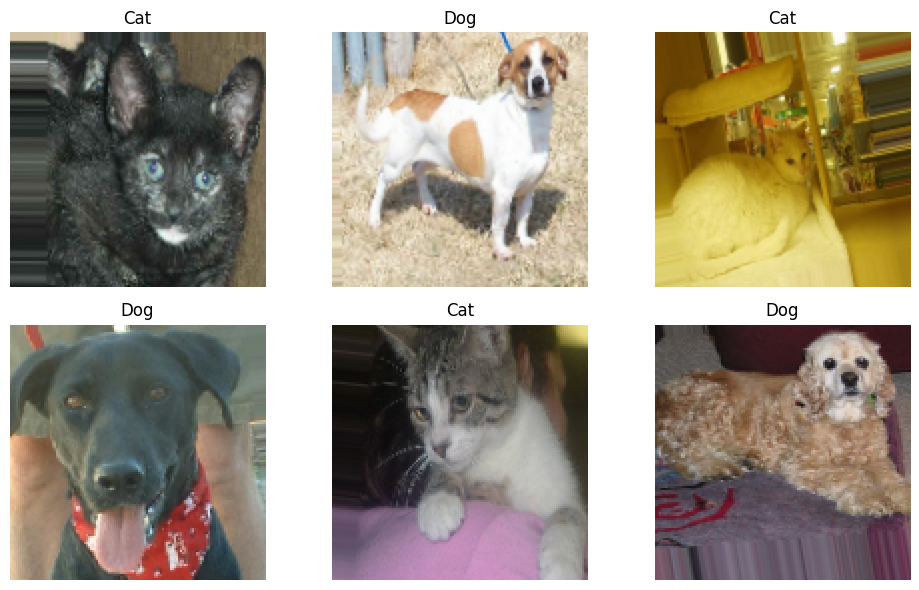

In [7]:
# images, labels = next(train_data)

# plt.figure(figsize=(10, 6))
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(images[i])
#     plt.title("Dog" if labels[i] == 1 else "Cat")
#     plt.axis("off")
# plt.tight_layout()
# plt.show()